# Movie reviews - Final Assignment Iteration #1
### Heew Kim | Oct 2020

First iteration of the final assignment 1 based on feature modification task 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

## Original feature building and extraction functions 

In [3]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 17, alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

## Original training and test sets from function

In [4]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do):
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data(fn='/Users/heewoong.kim/Documents/GitHub/ml/ProjectDataset/moviereviews_train.tsv', my_random_seed=99)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 131072)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9


## Fit (and tune) Various Models

### MODEL: ordinary least squares

In [5]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

#Train set
ols_performance_train = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train')
ols_performance_train.compute_measures()
print('OLS train model performance:')
print(ols_performance_train.performance_measures)

print('* * * * *')

#Test set
ols_performance_test = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test')
ols_performance_test.compute_measures()
print('OLS test model performance:')
print(ols_performance_test.performance_measures)

OLS train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 5337, 'TN': 4555, 'FP': 5457, 'FN': 4651, 'Accuracy': 0.4946, 'Precision': 0.4944413563090606, 'Recall': 0.5343412094513416, 'desc': 'ols_train'}
* * * * *
OLS test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 1421, 'TN': 1046, 'FP': 1442, 'FN': 1091, 'Accuracy': 0.4934, 'Precision': 0.4963325183374083, 'Recall': 0.5656847133757962, 'desc': 'ols_test'}


### MODEL: SVM, linear

In [6]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train')
svm_performance_train.compute_measures()
print('SVM train model performance:')
print(svm_performance_train.performance_measures)

print('* * * * *')

svm_performance_test = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test')
svm_performance_test.compute_measures()
print('SVM test model performance:')
print(svm_performance_test.performance_measures)

SVM train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train'}
* * * * *
SVM test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2119, 'TN': 2044, 'FP': 444, 'FN': 393, 'Accuracy': 0.8326, 'Precision': 0.8267655091689426, 'Recall': 0.8435509554140127, 'desc': 'svm_test'}


### MODEL: logistic regression

In [7]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train')
lgs_performance_train.compute_measures()
print('Log Reg train model performance:')
print(lgs_performance_train.performance_measures)

print('* * * * *')

lgs_performance_test = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test')
lgs_performance_test.compute_measures()
print('Log Reg test model performance:')
print(lgs_performance_test.performance_measures)

Log Reg train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train'}
* * * * *
Log Reg test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2141, 'TN': 2049, 'FP': 439, 'FN': 371, 'Accuracy': 0.838, 'Precision': 0.82984496124031, 'Recall': 0.8523089171974523, 'desc': 'lgs_test'}


### MODEL: Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train')
nbs_performance_train.compute_measures()
print('Naive Bayes train model performance:')
print(nbs_performance_train.performance_measures)

print('* * * * *')

nbs_performance_test = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test')
nbs_performance_test.compute_measures()
print('Naive Bayes test model performance:')
print(nbs_performance_test.performance_measures)

Naive Bayes train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9581, 'TN': 9851, 'FP': 161, 'FN': 407, 'Accuracy': 0.9716, 'Precision': 0.9834736193800041, 'Recall': 0.9592511013215859, 'desc': 'nbs_train'}
* * * * *
Naive Bayes test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 1854, 'TN': 1828, 'FP': 660, 'FN': 658, 'Accuracy': 0.7364, 'Precision': 0.7374701670644391, 'Recall': 0.7380573248407644, 'desc': 'nbs_test'}


### MODEL: Perceptron

In [9]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train')
prc_performance_train.compute_measures()
print(prc_performance_train.performance_measures)
 
print('* * * * *')

prc_performance_test = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test')
prc_performance_test.compute_measures()
print(prc_performance_test.performance_measures)

{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train'}
* * * * *
{'Pos': 2512, 'Neg': 2488, 'TP': 2114, 'TN': 2054, 'FP': 434, 'FN': 398, 'Accuracy': 0.8336, 'Precision': 0.8296703296703297, 'Recall': 0.8415605095541401, 'desc': 'prc_test'}


### MODEL: Ridge Regression Classifier

In [10]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train')
rdg_performance_train.compute_measures()
print(rdg_performance_train.performance_measures)

print('* * * * * ')

rdg_performance_test = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test')
rdg_performance_test.compute_measures()
print(rdg_performance_test.performance_measures)

{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train'}
* * * * * 
{'Pos': 2512, 'Neg': 2488, 'TP': 2060, 'TN': 1978, 'FP': 510, 'FN': 452, 'Accuracy': 0.8076, 'Precision': 0.8015564202334631, 'Recall': 0.8200636942675159, 'desc': 'rdg_test'}


### MODEL: Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train')
rdf_performance_train.compute_measures()
print(rdf_performance_train.performance_measures)

print('* * * * *')

rdf_performance_test = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test')
rdf_performance_test.compute_measures()
print(rdf_performance_test.performance_measures)

{'Pos': 9988, 'Neg': 10012, 'TP': 8431, 'TN': 6955, 'FP': 3057, 'FN': 1557, 'Accuracy': 0.7693, 'Precision': 0.7338962395543176, 'Recall': 0.8441129355226271, 'desc': 'rdf_train'}
* * * * *
{'Pos': 2512, 'Neg': 2488, 'TP': 2105, 'TN': 1722, 'FP': 766, 'FN': 407, 'Accuracy': 0.7654, 'Precision': 0.733194009056078, 'Recall': 0.8379777070063694, 'desc': 'rdf_test'}


### ROC plot to compare performance of various models and fits

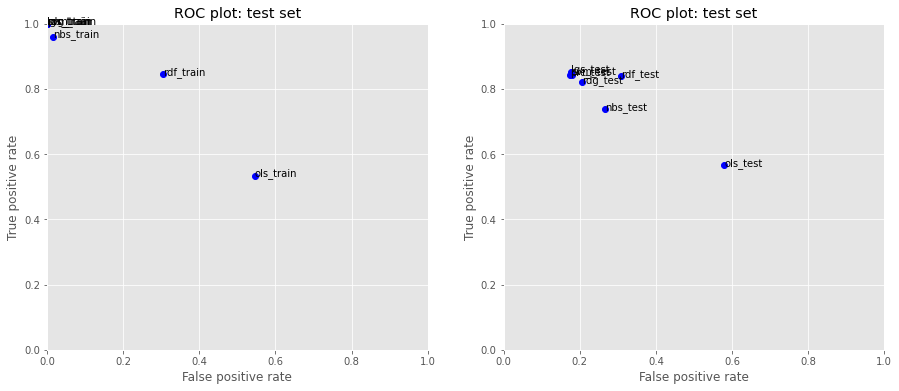

In [12]:
fits = [ols_performance_train, svm_performance_train, lgs_performance_train, nbs_performance_train, prc_performance_train, rdg_performance_train, rdf_performance_train]
fits1 = [ols_performance_test, svm_performance_test, lgs_performance_test, nbs_performance_test, prc_performance_test, rdg_performance_test, rdf_performance_test]

plt.style.use('ggplot')
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.subplot(1, 2, 2)
for fit in fits1:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.show()

## MODIFIED feature building and extraction functions 

In [13]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data_modified(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix; added uni- & bigrams; deleted stopwords
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 16, ngram_range = (1,2), alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

## MODIFIED training and test sets from function

In [14]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do):
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data_modified(fn='/Users/heewoong.kim/Documents/GitHub/ml/ProjectDataset/moviereviews_train.tsv', my_random_seed=99)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 65536)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5

## Fit (and tune) Various Models

### MODEL: ordinary least squares

In [15]:
from sklearn import linear_model
ols = linear_model.SGDClassifier(loss="squared_loss")
ols.fit(X_train, y_train)

#Train set
ols_performance_train_m = BinaryClassificationPerformance(ols.predict(X_train), y_train, 'ols_train_m')
ols_performance_train_m.compute_measures()
print('OLS train model performance:')
print(ols_performance_train_m.performance_measures)

print('* * * * *')

#Test set
ols_performance_test_m = BinaryClassificationPerformance(ols.predict(X_test), y_test, 'ols_test_m')
ols_performance_test_m.compute_measures()
print('OLS test model performance:')
print(ols_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(ols_performance_train_m.performance_measures['Accuracy'] - ols_performance_train.performance_measures['Accuracy'])
print(ols_performance_test_m.performance_measures['Accuracy'] - ols_performance_test.performance_measures['Accuracy'])

OLS train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 5405, 'TN': 4320, 'FP': 5692, 'FN': 4583, 'Accuracy': 0.48625, 'Precision': 0.487068577092908, 'Recall': 0.5411493792551061, 'desc': 'ols_train_m'}
* * * * *
OLS test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 1517, 'TN': 951, 'FP': 1537, 'FN': 995, 'Accuracy': 0.4936, 'Precision': 0.49672560576293384, 'Recall': 0.6039012738853503, 'desc': 'ols_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
-0.008349999999999969
0.00019999999999997797


### MODEL: SVM, linear

In [16]:
from sklearn import linear_model
svm = linear_model.SGDClassifier()
svm.fit(X_train, y_train)

svm_performance_train_m = BinaryClassificationPerformance(svm.predict(X_train), y_train, 'svm_train_m')
svm_performance_train_m.compute_measures()
print('SVM train model performance:')
print(svm_performance_train_m.performance_measures)

print('* * * * *')

svm_performance_test_m = BinaryClassificationPerformance(svm.predict(X_test), y_test, 'svm_test_m')
svm_performance_test_m.compute_measures()
print('SVM test model performance:')
print(svm_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(svm_performance_train_m.performance_measures['Accuracy'] - svm_performance_train.performance_measures['Accuracy'])
print(svm_performance_test_m.performance_measures['Accuracy'] - svm_performance_test.performance_measures['Accuracy'])

SVM train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'svm_train_m'}
* * * * *
SVM test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2107, 'TN': 2096, 'FP': 392, 'FN': 405, 'Accuracy': 0.8406, 'Precision': 0.8431372549019608, 'Recall': 0.8387738853503185, 'desc': 'svm_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
0.0
0.008000000000000007


### MODEL: logistic regression

In [17]:
from sklearn import linear_model
lgs = linear_model.SGDClassifier(loss='log')
lgs.fit(X_train, y_train)

lgs_performance_train_m = BinaryClassificationPerformance(lgs.predict(X_train), y_train, 'lgs_train_m')
lgs_performance_train_m.compute_measures()
print('Log Reg train model performance:')
print(lgs_performance_train_m.performance_measures)

print('* * * * *')

lgs_performance_test_m = BinaryClassificationPerformance(lgs.predict(X_test), y_test, 'lgs_test_m')
lgs_performance_test_m.compute_measures()
print('Log Reg test model performance:')
print(lgs_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(lgs_performance_train_m.performance_measures['Accuracy'] - lgs_performance_train.performance_measures['Accuracy'])
print(lgs_performance_test_m.performance_measures['Accuracy'] - lgs_performance_test.performance_measures['Accuracy'])

Log Reg train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'lgs_train_m'}
* * * * *
Log Reg test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2073, 'TN': 2081, 'FP': 407, 'FN': 439, 'Accuracy': 0.8308, 'Precision': 0.8358870967741936, 'Recall': 0.8252388535031847, 'desc': 'lgs_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
0.0
-0.007199999999999984


### MODEL: Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)

nbs_performance_train_m = BinaryClassificationPerformance(nbs.predict(X_train), y_train, 'nbs_train_m')
nbs_performance_train_m.compute_measures()
print('Naive Bayes train model performance:')
print(nbs_performance_train_m.performance_measures)

print('* * * * *')

nbs_performance_test_m = BinaryClassificationPerformance(nbs.predict(X_test), y_test, 'nbs_test_m')
nbs_performance_test_m.compute_measures()
print('Naive Bayes test model performance:')
print(nbs_performance_test_m.performance_measures)

print('* * * * *')

#compare with original feature function
print('Compare Modified & Original feature models accuracy (Modified - Original); Train & Test')
print(nbs_performance_train_m.performance_measures['Accuracy'] - nbs_performance_train.performance_measures['Accuracy'])
print(nbs_performance_test_m.performance_measures['Accuracy'] - nbs_performance_test.performance_measures['Accuracy'])

Naive Bayes train model performance:
{'Pos': 9988, 'Neg': 10012, 'TP': 9659, 'TN': 9685, 'FP': 327, 'FN': 329, 'Accuracy': 0.9672, 'Precision': 0.9672541558181454, 'Recall': 0.9670604725670805, 'desc': 'nbs_train_m'}
* * * * *
Naive Bayes test model performance:
{'Pos': 2512, 'Neg': 2488, 'TP': 2146, 'TN': 2085, 'FP': 403, 'FN': 366, 'Accuracy': 0.8462, 'Precision': 0.8418987838367987, 'Recall': 0.8542993630573248, 'desc': 'nbs_test_m'}
* * * * *
Compare Modified & Original feature models accuracy (Modified - Original); Train & Test
-0.0044000000000000705
0.1097999999999999


### MODEL: Perceptron

In [19]:
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(X_train, y_train)

prc_performance_train_m = BinaryClassificationPerformance(prc.predict(X_train), y_train, 'prc_train_m')
prc_performance_train_m.compute_measures()
print(prc_performance_train_m.performance_measures)
 
print('* * * * *')

prc_performance_test_m = BinaryClassificationPerformance(prc.predict(X_test), y_test, 'prc_test_m')
prc_performance_test_m.compute_measures()
print(prc_performance_test_m.performance_measures)

{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'prc_train_m'}
* * * * *
{'Pos': 2512, 'Neg': 2488, 'TP': 2107, 'TN': 2089, 'FP': 399, 'FN': 405, 'Accuracy': 0.8392, 'Precision': 0.840782122905028, 'Recall': 0.8387738853503185, 'desc': 'prc_test_m'}


### MODEL: Ridge Regression Classifier

In [20]:
from sklearn import linear_model
rdg = linear_model.RidgeClassifier()
rdg.fit(X_train, y_train)

rdg_performance_train_m = BinaryClassificationPerformance(rdg.predict(X_train), y_train, 'rdg_train_m')
rdg_performance_train_m.compute_measures()
print(rdg_performance_train_m.performance_measures)

print('* * * * * ')

rdg_performance_test_m = BinaryClassificationPerformance(rdg.predict(X_test), y_test, 'rdg_test_m')
rdg_performance_test_m.compute_measures()
print(rdg_performance_test_m.performance_measures)

{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'rdg_train_m'}
* * * * * 
{'Pos': 2512, 'Neg': 2488, 'TP': 2115, 'TN': 2078, 'FP': 410, 'FN': 397, 'Accuracy': 0.8386, 'Precision': 0.8376237623762376, 'Recall': 0.8419585987261147, 'desc': 'rdg_test_m'}


### MODEL: Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=2, random_state=0)
rdf.fit(X_train, y_train)

rdf_performance_train_m = BinaryClassificationPerformance(rdf.predict(X_train), y_train, 'rdf_train_m')
rdf_performance_train_m.compute_measures()
print(rdf_performance_train_m.performance_measures)

print('* * * * *')

rdf_performance_test_m = BinaryClassificationPerformance(rdf.predict(X_test), y_test, 'rdf_test_m')
rdf_performance_test_m.compute_measures()
print(rdf_performance_test_m.performance_measures)

{'Pos': 9988, 'Neg': 10012, 'TP': 8211, 'TN': 7639, 'FP': 2373, 'FN': 1777, 'Accuracy': 0.7925, 'Precision': 0.7757936507936508, 'Recall': 0.8220865038045655, 'desc': 'rdf_train_m'}
* * * * *
{'Pos': 2512, 'Neg': 2488, 'TP': 2057, 'TN': 1873, 'FP': 615, 'FN': 455, 'Accuracy': 0.786, 'Precision': 0.7698353293413174, 'Recall': 0.8188694267515924, 'desc': 'rdf_test_m'}


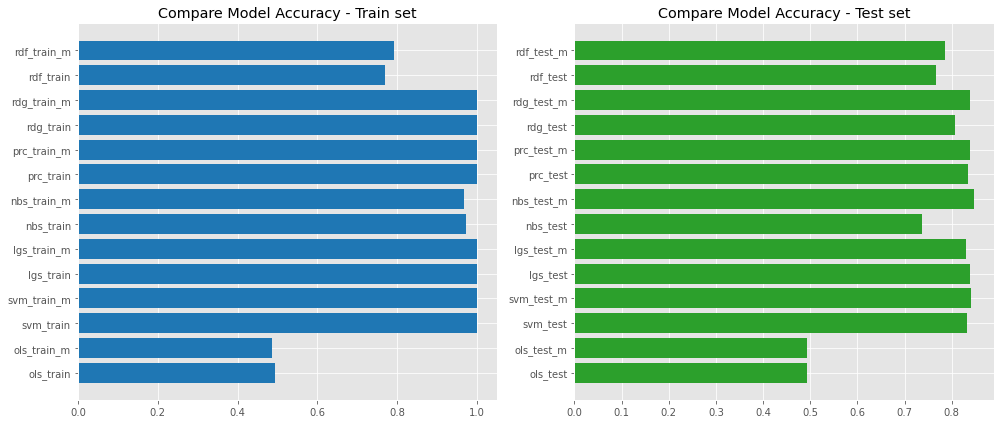

In [22]:
#compare models for modified and original features 

fits = [ols_performance_train, ols_performance_train_m, svm_performance_train, svm_performance_train_m, 
        lgs_performance_train, lgs_performance_train_m, nbs_performance_train, nbs_performance_train_m, 
        prc_performance_train, prc_performance_train_m, rdg_performance_train, rdg_performance_train_m, 
        rdf_performance_train, rdf_performance_train_m]
fits2 = [ols_performance_test, ols_performance_test_m, svm_performance_test, svm_performance_test_m, 
        lgs_performance_test, lgs_performance_test_m, nbs_performance_test, nbs_performance_test_m,
        prc_performance_test, prc_performance_test_m, rdg_performance_test, rdg_performance_test_m, 
        rdf_performance_test, rdf_performance_test_m]


plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
for fit in fits:
    plt.barh(fit.desc, fit.performance_measures['Accuracy'], color=['tab:blue'])
    plt.title('Compare Model Accuracy - Train set')

plt.subplot(1, 2, 2)
for fit in fits2:
    plt.barh(fit.desc, fit.performance_measures['Accuracy'], color=['tab:green'])
    plt.title('Compare Model Accuracy - Test set')
    
plt.tight_layout()
plt.show()

### ROC plot to compare performance of various models and fits

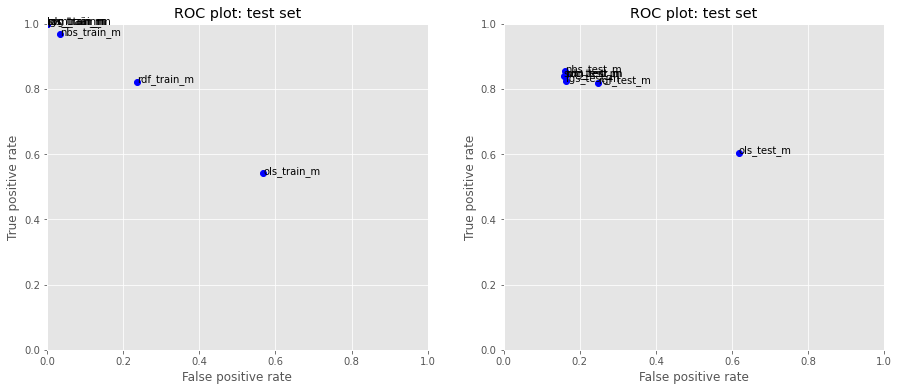

In [23]:
fits = [ols_performance_train_m, svm_performance_train_m, lgs_performance_train_m, nbs_performance_train_m, prc_performance_train_m, rdg_performance_train_m, rdf_performance_train_m]
fits1 = [ols_performance_test_m, svm_performance_test_m, lgs_performance_test_m, nbs_performance_test_m, prc_performance_test_m, rdg_performance_test_m, rdf_performance_test_m]

plt.style.use('ggplot')
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.subplot(1, 2, 2)
for fit in fits1:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.show()

### looking at reviews based on their classification

Select Naive Bayes model using the modified features code. 

In [25]:
nbs_predictions = nbs.predict(X_train)

### let's look at some false positives:

In [26]:
# false positives

print("Examples of false positives:")

import random, time

for i in range(0, len(nbs_predictions)):
    if (nbs_predictions[i] == 1):
        if (X_raw_train.iloc[i]['sentiment'] == 0):
            if (random.uniform(0, 1) < 0.05): # to print only 5% of the false positives
                print(i)
                print(X_raw_train.iloc[i]['review'])
                print('* * * * * * * * * ')


Examples of false positives:
197
This cowardly and offensive film had me intrigued to begin with. The characters are the familiar dispossessed young males frequently to be seen hanging around bored in a sea side town. Robert is an outsider but he has his music which could have been his soul. Instead Clay makes Robert into a freak who embarks on a journey into cannabis and ecstasy and getting in with the wrong crowd. Clay seems to believe in \reefer madness\" and Robert ends the film as a homicidal rapist. One wonders how much experience of real life this young director has. No one can save poor Robert. Clay leaves us with the message that young British men are out of control. A very unsubtle link is made to the Iraqi insurgents; during the needlessly graphic rape we are subjected to explosions and images of war. The film shows male peer group extremism pushed to it's limits. The young bombers in London draw a parallel with Clay's hateful depiction of modern male. Clay implies that men 

4383
Okay, I'm not going to critique this film in depth. I note the many elogious reviews in advance of me, and as I generally like Maria de Medeiros, I have been long hesitant to make a disparaging comment - and in such fashion nearly a year has passed. But each time I see that DVD on my shelf, I sense an inner groan. Anyway, let the elogious voices override me! But for other cinephiles like me - beware.<br /><br />Expressed in simplest and gentlest terms, here's my stance:<br /><br />The political turmoil and overthrow providing the backdrop for this film also served as a backdrop for a certain period of my life - via newspapers I read daily in my local middle-European pub. At that time, I followed the newsreports, but never fully grasped what the heck was transpiring. The reporters tended to report either in non-partisan terms, or with a conservatism which frowned upon any groups disturbing the peace or fomenting rebellion against the establishment. Those were times when other winds

7886
It is enjoyable and fast-paced. <br /><br />There is no way on Earth that the actor playing Mat could be eighteen. However, the main thing is that he does act eighteen very convincingly. It must be a credit to his audition that he convinced them to cast him. I quite soon accepted him as being a naive young country boy.<br /><br />While his was the best performance, most of the others were also very engaging. In particular, the interplay between the policemen was natural and well-balanced, and worked very well.<br /><br />It is only about 45 minutes long, so the plot is not complex. More key is the style of the whole thing. It is very slick and vibrant, and the backdrops are atmospheric, especially from the fact that all the colours are extremely rich. The gangland is identifiable to foreign audiences, but still manages to be distinctly Australian.
* * * * * * * * * 
9817
Bridges of madison county is a better made version of this story. I felt the ending of this movie was not handl

16396
Drew Latham(Ben Affleck)is determined not to be lonely this Christmas. Not only is Drew a millionaire; but also obnoxious and guilty of being very grandiose. Drew goes back to the home he grew up in and offers the family living there, the Valco's, $250,000 to be his \family\" through the Christmas season. Tom Valco(James Gandolfini)is reluctant, but is greedy enough to take Drew's offer. Christine Valco(Catherine O'Hara)has little to say in the matter, but learns to like having Drew around...not exactly the same sentiment with daughter Alicia(Christina Applegate), but that too has room for change. Drew's girlfriend Missy(Jennifer Morrison)tracks down Drew and wants her folks to meet his family. Genuine fun is in store as a happy Noel becomes a hilarious dysfunctional nightmare. Other members of the cast: Josh Zuckerman, Bill Macy, David Selby and Stephanie Faracy. Affleck is comedic, albeit strange."
* * * * * * * * * 


---

# <span style="color:red">SUBMISSION</span>

---

In [27]:
# read in test data for submission
# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do): 
raw_data, X_test_submission = process_raw_data(fn='/Users/heewoong.kim/Documents/GitHub/ml/ProjectDataset/moviereviews_test.tsv', my_random_seed=99, test=True)
print("Number of rows in the submission test set (should be 25,000): ")

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 2 columns 

the data types for each of the columns in movie_data:
id        object
review    object
dtype: object 

the first 10 rows in movie_data:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...
Shape of HashingVectorizer X:
(25000, 65536)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         131           5
1         169          15
2         176          18
3         112           5
4         133           8
5         331          20
6         121          18
7         230          22
8          59           3
9         224          14
Size 

---

Choose a <span style="color:red">*single*</span> model for your submission. In this code, I am choosing the Ordinary Least Squares model fit, which is in the `ols` object. But you should choose the model that is performing the best for you! 

In [28]:
# store the id from the raw data
my_submission = pd.DataFrame(raw_data["id"])
# concatenate predictions to the id
my_submission["prediction"] = nbs.predict(X_test_submission)
# look at the proportion of positive predictions
print(my_submission['prediction'].mean())

0.49172


In [29]:
raw_data.head()

,id,review,word_count,punc_count
0,12311_10,Naturally in a film who's main themes are of m...,131,5
1,8348_2,This movie is a disaster within a disaster fil...,169,15
2,5828_4,"All in all, this is a movie for kids. We saw i...",176,18
3,7186_2,Afraid of the Dark left me with the impression...,112,5
4,12128_7,A very accurate depiction of small time mob li...,133,8


In [30]:
my_submission.head()

,id,prediction
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,0
4,12128_7,1


In [31]:
my_submission.shape

(25000, 2)

In [33]:
# export submission file as csv
# CHANGE FILE PATH: 
my_submission.to_csv('/Users/heewoong.kim/Documents/GitHub/ml/final_assignment_1/moviereviews_submission1.csv', index=False)

# Submit to Canvas: 1) the CSV file that was written in the previous cell and 2) the url to the repository (GitHub or other) that contains your code and documentation